# API SETUP

if line[1] doesnt work then data rate needs to be increased. Input this in anaconda prompt 
-> "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

In [34]:
import os
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from time import time, sleep
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)   #set display options for dataframes
pd.set_option('display.max_columns', None)

def save_to_csv(df):        #function to save csv
    if not os.path.isfile(r"C:\Users\Phage\Desktop\C0D3/AutoCrypto API/API.csv"):
        df.to_csv(r"C:\Users\Phage\Desktop\C0D3/AutoCrypto API/API.csv")
    else:
        df.to_csv(r"C:\Users\Phage\Desktop\C0D3/AutoCrypto API/API.csv", mode='a',header=False)  #if exists, append so headers are distinct

# AUTOMATION

In [2]:
def api_runner():         #API
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '13af2f04-2bb8-4389-8500-ad7cb7b8d4d7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])       #stores into DF
    df['timestamp'] = pd.to_datetime('now')    #adds timestamp column
    save_to_csv(df)                            #save to csv

In [33]:
for i in range(333):         #Access API every 60 mins
    api_runner()
    print("API Runner Completed")
    sleep(60)
    
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [5]:
#api_runner() -run for testing

# this part is for EDA

In [35]:
pd.read_csv(r"C:\Users\Phage\Desktop\C0D3/AutoCrypto API/API.csv")

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [37]:
#df.head(10)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11629,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19737087.00000,19737087.00000,False,NaN,1,NaN,NaN,NaN,2024-08-08T07:30:00.000Z,57401.51710,41190717466.49456,-12.18370,0.43024,1.12354,-10.80843,0.23711,-17.23715,-9.23848,1132938736989.10083,56.16590,1205431859157.88989,NaN,2024-08-08T07:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 07:32:10.756247
1,1,1027,Ethereum,ETH,ethereum,9197,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120261233.89225,120261233.89225,True,NaN,2,NaN,NaN,NaN,2024-08-08T07:29:00.000Z,2427.36645,23590007655.18403,-4.64300,-0.24680,-2.97336,-23.49900,-20.95659,-34.20271,-20.31908,291918084148.91541,14.47190,291918084148.91998,NaN,2024-08-08T07:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 07:32:10.756247
2,2,825,Tether USDt,USDT,tether,93767,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,114551170628.49146,117068083201.87019,True,NaN,3,NaN,NaN,NaN,2024-08-08T07:29:00.000Z,1.00040,71663839334.01071,-5.98950,0.01553,-0.03007,0.08512,0.03236,0.05305,0.04906,114596432164.49300,5.68140,117114339222.07001,NaN,2024-08-08T07:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 07:32:10.756247
3,3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466346099.83370,581802051.37284,True,NaN,4,NaN,NaN,NaN,2024-08-08T07:29:00.000Z,155.06470,5423252849.34882,-5.37720,0.77810,2.13533,-8.09949,8.75120,-2.74364,0.00862,72313817780.91748,3.58750,90216960198.75000,NaN,2024-08-08T07:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 07:32:10.756247
4,4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145936769.22727,145936769.22727,False,NaN,5,NaN,NaN,NaN,2024-08-08T07:29:00.000Z,487.11579,1848543875.88635,-8.18920,-0.20933,-0.62875,-14.42335,-5.13396,-28.38415,-18.29040,71088104552.62518,3.52420,71088104552.63000,NaN,2024-08-08T07:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 07:32:10.756247
5,5,3408,USDC,USDC,usd-coin,21413,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34498125153.87411,34498125153.87411,False,NaN,6,NaN,NaN,NaN,2024-08-08T07:29:00.000Z,1.00004,8752131214.73713,-11.27850,0.01119,-0.00343,0.00583,-0.00267,-0.00075,0.00101,34499349505.46148,1.71040,34499349505.46000,NaN,2024-08-08T07:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-08 07:32:10.756247
6,6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,NaN,2024-08-08T07:30:00.000Z,0.60414,5170777390.05332,225.08250,-0.11891,18.02419,-0.77627,39.08177,22.28050,16.77585,33831483711.39750,1.67810,60414136262.18000,NaN,2024-08-08T07:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 07:32:10.756247
7,7,11419,Toncoin,TON,toncoin,492,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2518292947.48382,5110165646.92520,True,NaN,8,3414166606.00000,21840844323.16831,NaN,2024-08-08T07:29:00.000Z,6.39712,631230721.33754,81.92530,2.15983,11.42786,-5.53364,-12.26099,-9.46472,-7.17562,16109830179.19156,0.79920,32690359094

In [39]:
df2 = df.groupby('name')[['quote.USD.percent_change_1h',
 'quote.USD.percent_change_24h',
 'quote.USD.percent_change_7d',
 'quote.USD.percent_change_30d',
 'quote.USD.percent_change_60d',
 'quote.USD.percent_change_90d']].mean().head(10)

In [40]:
#df2

In [41]:
#cpaste = [columns for columns in df.columns]   #this was used to copy paste groupby list items.
#cpaste

In [43]:
df3 = df2.stack()      #pivot type

In [44]:
#df3

In [45]:
df4 = df3.to_frame(name='values')  #converts stack to dataframe

In [46]:
df5 = df4.reset_index()     #recent index

In [47]:
df6 = df5.rename(columns={'level_1': 'percent_change'})  

In [48]:
#df6 

In [49]:
df7 = df6
df7['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [50]:
#df7

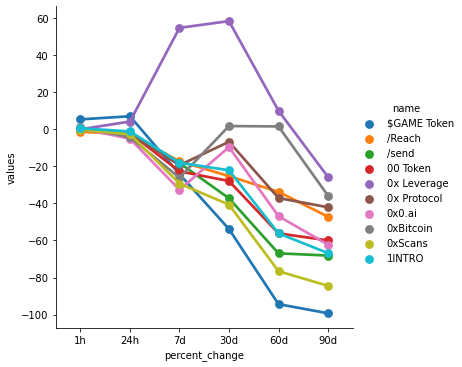

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')  #catplot of percent change per time frames

In [53]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]

In [55]:
df8.query("name == 'Bitcoin'")

,name,quote.USD.price,timestamp
0,Bitcoin,57401.51710,2024-08-08 07:32:10.756247
5000,Bitcoin,57382.27199,2024-08-08 07:33:13.816864
10000,Bitcoin,57279.61910,2024-08-08 07:34:16.409556
15000,Bitcoin,57271.78383,2024-08-08 07:35:19.712847
20000,Bitcoin,57260.14880,2024-08-08 07:36:22.292270
25000,Bitcoin,57300.26676,2024-08-08 07:37:26.774237
30000,Bitcoin,57300.26676,2024-08-08 07:38:28.652747


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

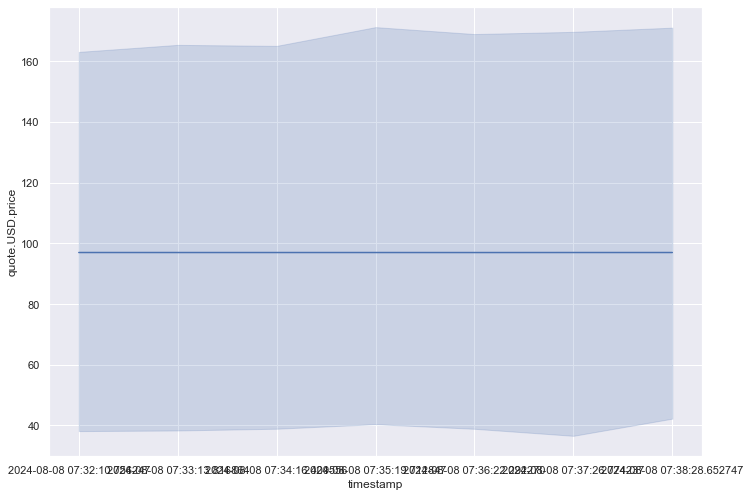

In [62]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)}, style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)